# Calculating outputs from neurons manually.

Here, we begin by considering three nodes, with 4 total inputs. This is what a hand-coded version would look like:

In [1]:
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
          inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2,
          inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3]
print(output)

[4.8, 1.21, 2.385]


However, we can make this a lot nicer. Let us use a list of lists instead.
Note that in the below code, "zip" takes two lists and creates an association list element-wise, so for instance, 
    **zip(weights, biases)**
        => [[weights1, bias1],
            [weights2, bias2],
            [weights3, bias3]]
with the list(s) defined above and below.

In [2]:
inputs = [1, 2, 3, 2.5]

# Weights as a list, all together:
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

# And then we can use the following loop to calculate our output:
layer_outputs = []  # Output of current layer
for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)

print(layer_outputs)

[4.8, 1.21, 2.385]


**Let us analyse what the code above does.**

"weights" is stored as a list of lists, with 

    weights[0] = weights1  (from earlier)
    weights[1] = weights2
    weights[2] = weights3
    
"biases" are stored as a list. 

We initialize an array called *layer_outputs*. We will use this to store our newly calculated layer values.

First, we **iterate over the lists in zip(weights, biases)**, i.e. we are iterating over 

    neuron_weights = weights[0] => weights[1] => weights[2]
    neuron_biases = biases[0] => biases[1] => biases[2] 
    
and then we initialize "neuron_output" where we will store our neuron's output.
    
   Then, we iterate over **inputs and weights** in zip(inputs, neuron_weights), so
   
        n_input = inputs[0] =>      inputs[1] =>      inputs[2] =>      inputs[3]
        weight =  weights[i][0] =>  weights[i][1] =>  weights[i][2] =>  weights[i][3]
        
   where "i" ranges from 0 to 2, since we were already iterating on weights.
    
We update "neuron_output" by adding the weight\*input for each weight and input. 

Then, we append the calculated output to our list/array of layer_outputs, which will store the outputs for all the neurons in our layer.

###  We need to understand more about "Shape" and our data structures.

Arrays are lists with "shape." It's how we store vectors, matrices, lists, etc. in Python. 
Here are some examples:

1D array (or vector):

    l = [1, 5, 6, 2]
    Shape: (4)
    
2D array (or matrix):

    lol = [[1, 5, 6, 2],
           [3, 2, 1, 3]]  # a 2-list of 1D arrays.
    Shape: (2, 4)
    
3D array (mathematical equivalent?)

    lolol = [[[1, 5, 6, 2],
              [3, 2, 1, 3]],
             [[5, 2, 1, 2],
              [6, 4, 8, 4]],
             [[2, 8, 5, 3],
              [1, 1, 9, 4]]]  # a 3-list of 2D arrays.
    Shape: (3, 2, 4)
    
**Arrays have to be homologous.** Each list in our list of lists needs to have the same size.

####  How do we multiply our matrix "weights" with our vector "inputs"?  We use the dot product.
Let's try to implement this with just one neuron.
We will use numpy for this.

In [3]:
import numpy as np

inputs = [1, 2, 3, 2.5]

weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

# Now we calculate the dot product. Notice that here, the order doesn't matter, since both "inputs" and "weights"
# are just vectors.
output = np.dot(inputs, weights) + bias
print(output)

output = np.dot(weights, inputs) + bias
print(output)


4.8
4.8


In [4]:
import numpy as np

inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

# Now when we calculate our biases, notice that "weights" is a matrix but "inputs" is a vector. Order now matters.
output = np.dot(weights, inputs) + biases

# We want back three outputs (one for each neuron that we have).
# np.dot indexes by the FIRST argument, and we want things indexed by the WEIGHT SETS we have, since we have
# three weight sets.
# IF we index by the inputs, we will get four indices, but this is not what we want. 
# It will encounter a "Shape Error"

print(output)

# When we try the other way:
try:
    output = np.dot(inputs, weights)
except:
    print("Error!")

[4.8   1.21  2.385]
Error!


More specifically, this is what np.dot(weights, inputs) is doing:

np.dot(weights, inputs):
     weights[0] o inputs
  \+ weights[1] o inputs
  \+ weights[2] o inputs
  
and then we add the "biases" vector to get our final output value.

So far, **our input data has been a 1D array, or a vector.** 
Soon, we'll be working with batches of these "samples" so we will get a 2D array, or a matrix, of input data.


# Batches, Layers and Objects
Why do we need batches? 
- Faster computation
- Generalization:
      Our inputs are currently a single sample. Suppose each value is some reading from some sensor (at some specific point in time). We can
      convert this into a batch of samples over some period of time. *What are our inputs right now?* (We want to be able to pass in a batch
      of samples instead, so the algorithm tries **generalizing** rather than specializing to one sample.

  **Batches too large: computationally expensive and fails to generalize to unseen data**
  **Batches too small: may not as representative of full data, so hard to find correct patterns**
  Ideally, batch sizes are 32/64/128. 

  Consider a set of **three inputs**:

In [5]:
import numpy as np

# We've added some inputs:
inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

# But notice we don't need to change anything related to our weights and biases! This is because our weights/biases are dependent on how many
# neurons our hidden layer has. That's controlled by us.
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

# And now our dot product is a matrix product:
try:
    output = np.dot(weights, inputs) + biases
except:
    print("Error!")

# Recall that we reached an error when the above order is not right. The indices NEED to match.
    # weights: 4x3
    # inputs:    4x3
# These don't match!
    # inputs:  4x3
    # weights:   4x3
# But these don't match either!

# We have to do something else. We are trying to multiply inputs and weights. We want (for input 1, for instance):
    # 1*0.2 + 2*0,8 + 3*-0.5 + 2.5*1.0

# So we have to "transpose" our weights matrix. First, we need to convert our data into ARRAYS in numpy. 
    # inputs:    4x3
    # weights.T:   3x4

output = np.dot(inputs, np.array(weights).T) + biases
print(output)

Error!
[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


### Let's add another layer of the same size.


In [6]:
import numpy as np

# We've added some inputs:
inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

# Layer 1:
weights1 = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases1 = [2, 3, 0.5]

# Layer 2:
weights2 = [[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]


# Outputs of Layer 1:  (these become the inputs of Layer 2)
layer1_outputs = np.dot(inputs, np.array(weights1).T) + biases1

# Outputs of Layer 2:  (using outputs from Layer 1)
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


## Let's try to make our code more dynamic. We want to convert our concepts into Object-Oriented Programming.


In [7]:
import numpy as np

# To reproduce tutorial results:
np.random.seed(0)

# Input data set:
X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]


# Defining a hidden layer class:
class Layer_Dense:
    # Initializing a layer (how do we do this?)
    #   a) either you load in a pre-trained model;
    #   b) or you train a new one model.
    # Let's consider case (b).

    # We initialize weights as random values (generally with small values). We do this to avoid overflow.
    # We usually initialize biases at 0, but we may need to modify this based on whether we end up resulting in a dead network
    #   (a lack of neuron activation entirely).
    def __init__(self, n_inputs, n_neurons):
        # n_inputs: "How many features in each sample?"
        # n_neurons: "How many neurons in this layer?"
        # weights = random weight array of shape (a, b). The 0.10* scales the values down.
        # we choose (n_inputs x n_neurons) as our array shape so we avoid doing any transpose for the forward propagation.
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

# Defining our two hidden layers:

# n_inputs for layer1 is 4 because each input "sample" has 4 values, eg.: [1, 2, 3, 2.5]
# n_neurons can be anything we want.
layer1 = Layer_Dense(4, 5)

# n_inputs has to be the output size of the previous layer, so here it'd be 5.
# n_neurons can be anything we want.
layer2 = Layer_Dense(5, 2)

layer1.forward(X)  # forward pass of layer1 using the data "X"
print(layer1.output)

layer2.forward(layer1.output)  # forward pass of layer2 using the data "layer1.output"
print(layer2.output)

[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


## Clean version of the code above:

In [8]:
import numpy as np

# To reproduce tutorial results:
np.random.seed(0)

# Input data set:
X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]


# Defining a hidden layer class:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

# Defining our two hidden layers:
layer1 = Layer_Dense(4, 5)
layer2 = Layer_Dense(5, 2)

layer1.forward(X)  # forward pass of layer1 using the data "X"
print(layer1.output)

layer2.forward(layer1.output)  # forward pass of layer2 using the data "layer1.output"
print(layer2.output)


[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


# Hidden Layer Activation Functions
There are many options for activation functions.

### Step Function:
1, if x>0;
0, otherwise.
### Sigmoid Function:
y = \frac{1}{1 + e^{-x}}

Smoother functions are more granular, so they help preserve information when we go through backpropagation. The optimizer won't know how the weights impacted an output during backpropagation otherwise.

### ReLU (Rectified Linear Unit):
x, if x>0;
0, otherwise.
A good balance between granularity and simplicity.
    The sigmoid function has an issue called the "vanishing gradient problem," which we will get to later.
    ReLU is fast (very simple calculation) and just works.

Step functions simplify our weighted output into a simpler input for the next layer.
**Every neuron will have an activation function**
Usually, the output layer would have a different activation function than the hidden layers.

### Why use an activation function?
If we just used weights and biases, our activation is essentially just linear (input = output). 
We can only fit linear functions with linear activation. We cannot fit non-linear data (see notes on Notability for diagrams). We need non-linear activation functions to help fit non-linear data and outputs.

Why does this work?
ReLU is *almost* linear, but the rectification is what makes it as powerful as sigmoid, super fast, and is finally what makes it work.

See https://youtu.be/gmjzbpSVY1A?si=AWJqsLvM6WRQ0b2_&t=747 for more.


### Example of ReLU implementation:

In [9]:
import numpy as np

# Sample of ReLU:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []  # initializing empty list

# Coding ReLU for our sample "inputs":
for i in inputs:
    output.append(max(0, i))

print(output)


[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


### Using ReLU and creating an object:

In [10]:
import numpy as np
import nnfs  # To follow along the tutorial and get the same results as produced in the video.
from nnfs.datasets import spiral_data
             # Also generates data for us, so we can access the same dataset as in the tutorial.
             # Remark: this dataset is quite challenging, it's a spiral-like dataset.
                # We have 3 classifications for "something," 100 feature sets, and 2 features per set (x, y).
                # Goal:  (x, y) ==> classify our point into one of the 3 classifications.

# Sets our random seed and a default datatype for numpy:
nnfs.init()

# X: feature sets,  y: targets/classifications
X, y = spiral_data(100, 3)


# Defining a hidden layer class:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

# Defining a ReLU class:
class Activation_ReLU:
    def forward(self, inputs):
        # applies ReLU to the entire array "inputs" using numpy
        self.output = np.maximum(0, inputs)

# n_inputs is our number of inputs:  2
# n_neurons is our number of neurons (whatever we want):  
layer1 = Layer_Dense(2, 5)

# Defining activation1 to be our activation function for layer1:
activation1 = Activation_ReLU()

layer1.forward(X)  # forward pass of layer1 using the data "X"; creates a "layer1.output" array
print(layer1.output)

activation1.forward(layer1.output)  # applies activation1.forward to our layer1.output array; creates an "activation1.output" array
print(activation1.output)  


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-8.35815910e-04 -7.90404272e-04 -1.33452227e-03  4.65504505e-04
   4.56846210e-05]
 [-2.39994470e-03  5.93469958e-05 -2.24808278e-03  2.03573116e-04
   6.10024377e-04]
 ...
 [ 1.13291524e-01 -1.89262271e-01 -2.06855070e-02  8.11079666e-02
  -6.71350807e-02]
 [ 1.34588361e-01 -1.43197834e-01  3.09493970e-02  5.66337556e-02
  -6.29687458e-02]
 [ 1.07817926e-01 -2.00809643e-01 -3.37579325e-02  8.72561932e-02
  -6.81458861e-02]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.07817926e-01 0.00000000e+00 0.00000000e+00 8.72561932e-02
  0.00000000e+00]

## Softmax Activation for Output Neurons
Why not continue with ReLU? 
Let's illustrate this with a fresh script.

In [11]:
import math
# Suppose these are our output values. What do we do with these? 
# Suppose index 0 is the target. How "wrong" is this model? Accuracy and confidence are two different things.
layer_outputs = [4.8, 1.21, 2.385]

# 1: ReLU is unbounded. The relative "closeness" can vary a lot with every forward pass of the network. 
# 2: How do we measure how "wrong" our outputs are in a uniform way?

# We use Softmax to help us solve this. What's our goal with Softmax?
# We want values that are a probability distribution. Then everything will be uniform across samples, normalized across neurons (so we can
# actually define a cost function), etc. Now we can measure confidence.

# Getting the value of "e"
E = math.e

# Initializing an empty list:
exp_values = []

# First, we exponentiate each value:
for output in layer_outputs:
    exp_values.append(E**output)

print(exp_values)

# Then we need to normalize our values:
# Creating the denominator of our normalization:
norm_base = sum(exp_values)
# Initializing our normalized value list:
norm_values = []

# Normalizing all our values
for value in exp_values:
    norm_values.append(value / norm_base)

print(norm_values)
# And our normalization values should add up to approximately 1:
print(sum(norm_values))

[121.51041751873483, 3.353484652549023, 10.859062664920513]
[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


In [12]:
# Let's convert this to numpy code instead.
import numpy as np

layer_outputs = [4.8, 1.21, 2.385]

# Using the numpy function that lets us exponentiate each value in an array:
exp_values = np.exp(layer_outputs)

# Calculating normalization values:
norm_values = exp_values / np.sum(exp_values)

print(norm_values)
print(sum(norm_values))

[0.89528266 0.02470831 0.08000903]
0.9999999999999999


In [13]:
# We want to convert everything above to work as a batch:
import numpy as np
import nnfs

nnfs.init()

layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]

# We don't change anything to np.exp since it works on arrays:
exp_values = np.exp(layer_outputs)

# Calculating normalization values over a batch:
#   The issue is that np.sum will work on the entire array and add all values in our batch. We want three output values instead.
#   We use the axis parameter:  by default, axis=None is used.
#                               axis=0 adds columns.
#                               axis=1 adds rows. This is what we want.
#   We also use keepdims=True to retain the dimensions of our matrix.
norm_base = np.sum(layer_outputs, axis=1)
print(norm_base)
# (With keepdims=True):
norm_base = np.sum(layer_outputs, axis=1, keepdims=True)
print(norm_base)

# Then we have to divide. We need to make sure things line up in our division, though.
norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)

print(norm_values)

# However, we need to be careful with overflow with exponentiation. Therefore, what we do is we subtract the MAXIMUM value in our array
# from all the other values, and then exponentiate. 
# Then, the largest value being exponentiated in our array is 0, so everything after exponentiation is in the range [0, 1].
# The actual output stays identical to our other method. We just prevent overflow here.

[8.395 7.29  2.487]
[[8.395]
 [7.29 ]
 [2.487]]
[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


## Including our Softmax Activation Class:

In [14]:
import numpy as np
import nnfs  # To follow along the tutorial and get the same results as produced in the video.
from nnfs.datasets import spiral_data
             # Also generates data for us, so we can access the same dataset as in the tutorial.
             # Remark: this dataset is quite challenging, it's a spiral-like dataset.
                # We have 3 classifications for "something," 100 feature sets, and 2 features per set (x, y).
                # Goal:  (x, y) ==> classify our point into one of the 3 classifications.

# Sets our random seed and a default datatype for numpy:
nnfs.init()

# X: feature sets,  y: targets/classifications
X, y = spiral_data(samples=100, classes=3)


# Defining a hidden layer class:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

# Defining a ReLU class:
class Activation_ReLU:
    def forward(self, inputs):
        # applies ReLU to the entire array "inputs" using numpy
        self.output = np.maximum(0, inputs)

# Defining a Softmax class:
class Activation_Softmax:
    def forward(self, inputs):
        # Keep in mind that for each set in our batch, we need the max of each set separately.
        #   We subtract the max along axis=1, keeping the dimensions of our array.
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalization:
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

# Object dense1:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

# Printing the first 5 outputs (there are 300 of them):
print(activation2.output[:5])


[[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.33331832 0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]]


## Calculating Loss with Categorical Cross-Entropy
We need a metric for error. We use a loss/cost function. 
Accuracy is NOT what we want. We need the model to be confident in its response as well as accurate. We need to maximize the probabilities of the intended result, and minimize all other probabilities.

Categorical Cross-Entropy is often used in classification problems. It also becomes convenient in backpropagation and optimization steps.

**One-hot encoding:**
The idea is we have a vector that is n-classes long. Then we fill the vector with zeros, except the index of the target class (where the value will be one).

    Classes: 3
    Label: 2
    One-hot: [0, 0, 1]

    Classes: 4
    Label: 0
    One-hot: [1, 0, 0, 0]


Here, we're taking the natural log. Programmers usually don't do this, but we're doing it here.

Suppose we have the following setup:

    Classes: 3
    Label: 0
    One-hot: [1, 0, 0]
    Prediction: [0.8, 0.1, 0.2]

L = -(1\*log(0.7) + 0\*log(0.1) + 0\*log(0.2)) = 0.35667...
Since values for our target distrubtions were 0 for many values (all non-label values).


In [15]:
import math 

# Some random example Softmax output:
softmax_output = [0.7, 0.1, 0.2]

# We want to calculate loss. Suppose:
target_class = 0
# Then:
target_output = [1, 0, 0]

loss = -(math.log(softmax_output[0]) * target_output[0] + 
         math.log(softmax_output[1]) * target_output[1] +
         math.log(softmax_output[2]) * target_output[2])
# but notice target_output[1] = 0;
#            target_output[2] = 0.
print(loss)

# Therefore this is an equivalent form for our loss function:
loss = -(math.log(softmax_output[0]))
print(loss)

0.35667494393873245
0.35667494393873245


## Implementing Loss
Suppose we have the following information:

In [16]:
softmax_outputs = [[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]]

# The indices of the labels in each list we want to target (to be 1):
class_targets = [0, 1, 1]

# Confidence on correct labels:
#   0.7
#   0.5
#   0.9
# i.e. given by:
for targ_idx, distribution in zip(class_targets, softmax_outputs):
    print(distribution[targ_idx])

# Let's use numpy arrays instead.
import numpy as np

softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

# Then our output can be a vector/array instead of the above printing:
#    The [0, 1, 2] is the indices of the first dimension we're interested in.
#    class_targets is the indices of the second dimension we're interested in.
print(softmax_outputs[[0, 1, 2], class_targets])

# But we can use range() instead:
print(softmax_outputs[range(len(softmax_outputs)), class_targets])

# and if we wrap everything in a logarithm, we get our losses.
print(-np.log(softmax_outputs[range(len(softmax_outputs)), class_targets]))

# then the loss for the batch is just the average (mean) of all the losses:
neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])
average_loss = np.mean(neg_log)
print(average_loss)

# BUT WE HAVE A PROBLEM! What if we have log(0)? Our loss function has no bound! 
# We just clip all our values by some value, say 1e-7.


0.7
0.5
0.9
[0.7 0.5 0.9]
[0.7 0.5 0.9]
[0.35667494 0.69314718 0.10536052]
0.38506088005216804


In [17]:
import numpy as np
import nnfs  # To follow along the tutorial and get the same results as produced in the video.
from nnfs.datasets import spiral_data
             # Also generates data for us, so we can access the same dataset as in the tutorial.
             # Remark: this dataset is quite challenging, it's a spiral-like dataset.
                # We have 3 classifications for "something," 100 feature sets, and 2 features per set (x, y).
                # Goal:  (x, y) ==> classify our point into one of the 3 classifications.

# Sets our random seed and a default datatype for numpy:
nnfs.init()

# X: feature sets,  y: targets/classifications
X, y = spiral_data(samples=100, classes=3)


# Defining a hidden layer class:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

# Defining a ReLU class:
class Activation_ReLU:
    def forward(self, inputs):
        # applies ReLU to the entire array "inputs" using numpy
        self.output = np.maximum(0, inputs)

# Defining a Softmax class:
class Activation_Softmax:
    def forward(self, inputs):
        # Keep in mind that for each set in our batch, we need the max of each set separately.
        #   We subtract the max along axis=1, keeping the dimensions of our array.
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalization:
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

# Defining a Loss class:
class Loss:
    # output is our output values, "y" is our target output.
    def calculate(self, output, y):
        # Get sample losses (it'll be some vector of values):
        sample_losses = self.forward(output, y)
        # Calculating mean of the sample's losses:
        data_loss = np.mean(sample_losses)
        return data_loss

# Defining a Loss class for CCE (inheriting from the base Loss class):
class Loss_CategoricalCrossEntropy(Loss):
    # forward method with y_pred being the predictions, and y_true being the actual values.
    def forward(self, y_pred, y_true):
        # What is the total length?
        samples = len(y_pred)
        # We clip our values between something close to 0, and something close to 1:
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # We need to handle for both one-hot encoded values and non-encoded values:
        # Scalar values:
        if len(y_true.shape) == 1:
            # This is the case when y_true looks like [0, 1, 1] (for example)
            correct_confidences = y_pred_clipped[range(samples), y_true]
        # One-hot encoded vectors:
        elif len(y_true.shape) == 2:
            # This is the case when y_true looks like [[1, 0, 0], [0, 1, 0], [0, 1, 0]] (for example)
            # We're multiplying everything that isn't our target classification by 0. Then summing across axis=1 gives the values we want.
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1, keepdims=True)

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
            

# Object dense1:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

# Printing the first 5 outputs (there are 300 of them):
print(activation2.output[:5])

loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(activation2.output, y)

print("Loss: ", loss)

# Then we can calculate our predictions:
predictions = np.argmax(softmax_outputs, axis=1)
print(predictions)

# and our accuracy:
accuracy = np.mean(predictions == class_targets)  # calculating the average of how many of our predictions matched targets.
print("Accuracy: ", accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.33331832 0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]]
Loss:  1.098445
[0 1 1]
Accuracy:  1.0


# Building Micrograd (from scratch)
We're going to implement a backpropagation algorithm from scratch using pure mathematics. We've already done this for forward propagation, pretty much. 

In [18]:
# Importing libraries:
import math
import numpy as np
import matplotlib.pyplot as plt

#### Understanding Derivatives of Functions

In [19]:
# Let's define a function f(x):
def f(x):
    return 3*x**2 - 4*x + 5

print(3.0)

3.0


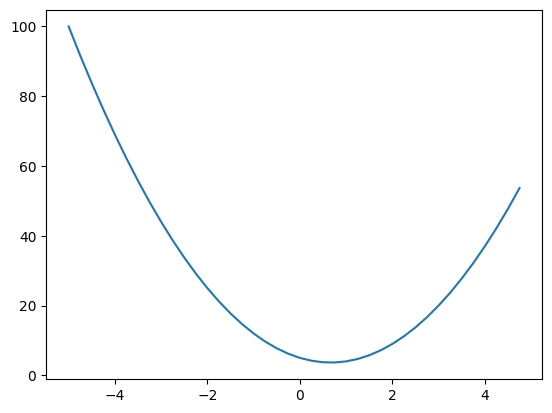

In [20]:
# Usage: np.arange(start, end, step)
xs = np.arange(-5, 5, 0.25)
# Applying function to this list:
ys = f(xs)

plt.plot(xs, ys)

In [21]:
# The derivatives at any point is simply the slope of the function at that point. We can estimate the derivative like this:
h = 0.00001
x = 3.0
print(f(x))
print(f(x + h))
print((f(x + h) - f(x)) / h)  # this is the slope of f(x) at x=3.0,  i.e. this is f'(3.0).

# If we make h too small, we'll get an invalid answer because of the memory limits of floating point arithmetic.

20.0
20.0001400003
14.00003000000538


In [22]:
# Let's complexify a bit:

# Inputs:
a = 2.0
b = -3.0
c = 10.0
# Define d to be the output in our three variables:
d1 = a * b + c

# What's the partial derivative of d, with respect to a, b, c?
h = 0.0001

# Partial "a"
a += h
d2 = a * b + c
print(f"d1: {d1} \nd2: {d2}")
print(f"slope 'a': {(d2 - d1)/h}\n")
a -= h

# Partial "b"
b += h
d3 = a * b + c
print(f"d1: {d1} \nd3: {d3}")
print(f"slope 'b': {(d3 - d1)/h}\n")
b -= h

# Partial "c"
c += h
d4 = a * b + c
print(f"d4: {d1} \nd3: {d4}")
print(f"slope 'b': {(d4 - d1)/h}\n")
c -= h

d1: 4.0 
d2: 3.999699999999999
slope 'a': -3.000000000010772

d1: 4.0 
d3: 4.0002
slope 'b': 2.0000000000042206

d4: 4.0 
d3: 4.0001
slope 'b': 0.9999999999976694



#### Creating Value Objects:

In [23]:
class Value:
    # Initialization:
    def __init__(self, data):
        self.data = data

    # Function that Python calls when "return" is called on a Value object:
    #     Without repr, our return values would look like value-address pairs, eg. <__main__.Value at 0x2839fb92>.
    def __repr__(self):
        return f"Value(data={self.data})"

    # We have to define the addition of Value objects:
    #    __add__ is a special operator:   a + b ==> a.__add__(b) ==> ... (this is how Python calls +)
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

    # Multiplication of Value objects:
    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out


# Instance example:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
print(a + b)
print(a * b)
print(a * b + c)

# But we're missing the "connective tissue." We need to know what values product what other values. We introduce "_children" and "_op".

Value(data=-1.0)
Value(data=-6.0)
Value(data=4.0)


In [24]:
class Value:
    # Initialization:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        # Defining _prev as a set for efficiency:
        self._prev = set(_children)
        # We'll get to this later:
        self.grad = 0
        self._op = _op
        self.label = label

    # Function that Python calls when "return" is called on a Value object:
    def __repr__(self):
        return f"Value(data={self.data})"

    # We have to define the addition of Value objects:
    # We've added (self, other) as children of out (our new Value object). We've added the operation "+" to _op.
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out

    # Multiplication of Value objects:
    # We've added (self, other) as children of out (our new Value object). We've added the operation "*" to _op.
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out


# Instance example:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
i = a * b; i.label = 'i'
d = i + c; d.label = 'd'
print(a + b)
print(a * b)
print(d)

f = Value(-2.0, label='f')
L = d * f; L.label = 'loss'

# Children of d:
print(d._prev)

# We also know how each value came to be, since we know what operations correspond to the creation of what values, using which children.
print(d._op)

Value(data=-1.0)
Value(data=-6.0)
Value(data=4.0)
{Value(data=10.0), Value(data=-6.0)}
+


#### Visualizing Value objects:

In [25]:
from graphviz import Digraph

def trace(root):
    # Builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR: left-to-right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # For any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it.
            dot.node(name = uid + n._op, label = n._op)
            # and connect the existing node to it.
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

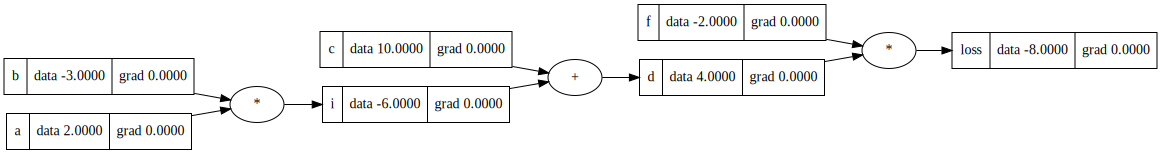

In [26]:
# This is what our forward pass looks like:
draw_dot(L)

#### Reconstructing Value Objects to implement gradient:

In [27]:
# Now we want to run backpropagation. What would this look like?
#    For each value, we're computing the derivative of L with respect to that node.
#    We want the derivative with respect to non-input nodes, and only weights/biases. 

class Value:
    # Initialization:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        # Initializing gradient at 0:
        self.grad = 0.0
        # Defining _prev as a set for efficiency:
        self._prev = set(_children)
        self._op = _op
        self.label = label

    # Function that Python calls when "return" is called on a Value object:
    def __repr__(self):
        return f"Value(data={self.data})"

    # We have to define the addition of Value objects:
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out

    # Multiplication of Value objects:
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out

    # Defining our activation function for Value:
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
        out = Value(t, (self, ), "tanh")
        return out
        


# Instance example:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
i = a * b; i.label = 'i'
d = i + c; d.label = 'd'
print(a + b)
print(a * b)
print(d)

f = Value(-2.0, label='f')
L = d * f; L.label = 'loss'

Value(data=-1.0)
Value(data=-6.0)
Value(data=4.0)


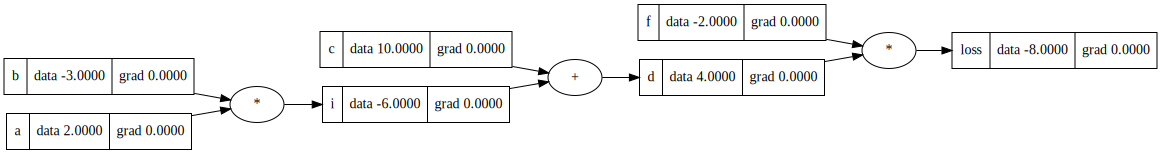

In [28]:
# Drawing our graph WITH grad:
draw_dot(L)

In [29]:
# We'd like to fill in each gradient starting from the far right, moving backwards.
#    eg.    L.grad = 1   since dL/dL = 1
L.grad = 1.0         # dL/dL
d.grad = f.data      # dL/dd   where   L = d * f
f.grad = d.data      # dL/df   where   L = d * f

c.grad = d.grad * 1      # dL/dc = dL/dd * dd/dc   where   dL/dd = f   and   d = c + a * b
i.grad = d.grad * 1      # by symmetry.

a.grad = d.grad * i.grad * b.data       # dL/da = dL/dd * dd/di * di/da   where   i = a * b
b.grad = d.grad * i.grad * a.data       # by symmetry.

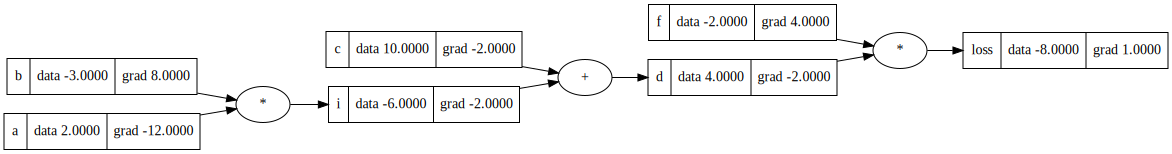

In [30]:
# Drawing our graph WITH grad (with inputs):
draw_dot(L)

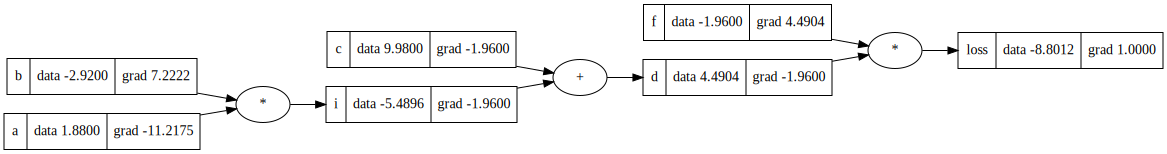

In [31]:
# Nudges:   notice we cannot nudge "i" or "d" since these are calculated from previous values.
# We can keep nudging. Notice how "L" will increase in value when we continue nudging.

step = 0.01
# Nudging:
a.data += step * a.grad
b.data += step * b.grad
i.data = a.data * b.data

c.data += step * c.grad
d.data = i.data + c.data; 

f.data += step * f.grad

# Updating values:
L.data = d.data * f.data

L.grad = 1.0         # dL/dL
d.grad = f.data      # dL/dd   where   L = d * f
f.grad = d.data      # dL/df   where   L = d * f

c.grad = d.grad * 1      # dL/dc = dL/dd * dd/dc   where   dL/dd = f   and   d = c + a * b
i.grad = d.grad * 1      # by symmetry.

a.grad = d.grad * i.grad * b.data       # dL/da = dL/dd * dd/di * di/da   where   i = a * b
b.grad = d.grad * i.grad * a.data       # by symmetry.

draw_dot(L)

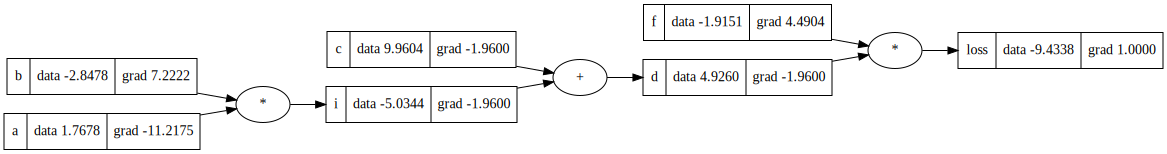

In [32]:
# Modify this slightly to cause nudges to converge to "0" as best as possible:
def sgn(x):
    if x >= 0:
        return 1
    else:
        return -1

def nudge():
    L.grad = -sgn(L.data)               # dL/dL
    d.grad = -sgn(L.data) * f.data      # dL/dd   where   L = d * f
    f.grad = -sgn(L.data) * d.data      # dL/df   where   L = d * f
    
    c.grad = d.grad * 1      # dL/dc = dL/dd * dd/dc   where   dL/dd = f   and   d = c + a * b
    i.grad = d.grad * 1      # by symmetry.
    
    a.grad = d.grad * i.grad * b.data       # dL/da = dL/dd * dd/di * di/da   where   i = a * b
    b.grad = d.grad * i.grad * a.data       # by symmetry.
    
    step = 0.01
    # Nudging:
    a.data += step * a.grad
    b.data += step * b.grad
    i.data = a.data * b.data
    
    c.data += step * c.grad
    d.data = i.data + c.data; 
    
    f.data += step * f.grad
    
    # Updating values:
    L.data = d.data * f.data
    

nudge()
draw_dot(L)

### Backpropagation through a Neuron

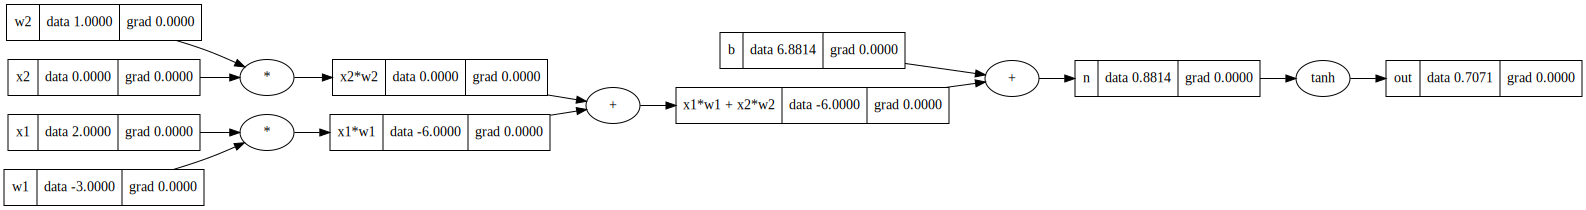

In [33]:
# Creating an example neuron:
# Inputs (x1, x2)
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights (w1, w2)
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.88137, label='b')

# Calculations:
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# Let's apply an activation function:
o = n.tanh(); o.label = 'out'

draw_dot(o)

In [34]:
# Calculating gradients for this new network:
o.grad = 1.0

n.grad = o.grad * (1 - o.data**2)

x1w1x2w2.grad = n.grad
b.grad = n.grad

x1w1.grad = n.grad
x2w2.grad = n.grad

w1.grad = x1.data * x1w1.grad
w2.grad = x2.data * x2w2.grad

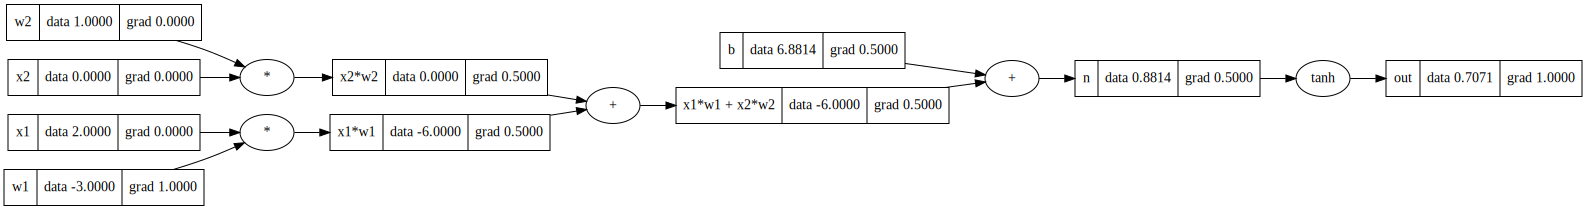

In [35]:
draw_dot(o)

In [36]:
# How can we implement the backward pass automatically?
# Let's modify the Value object. We are going to store a self._backward function which will do the chain rule at each node.

class Value:
    # Initialization:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        # Initializing gradient at 0:
        self.grad = 0.0
        # Defining backward function:
        self._backward = lambda: None  # by default, the function does nothing!
        # Defining _prev as a set for efficiency:
        self._prev = set(_children)
        self._op = _op
        self.label = label

    # Function that Python calls when "return" is called on a Value object:
    def __repr__(self):
        return f"Value(data={self.data})"

    # We have to define the addition of Value objects:
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        # What should _backward be for addition? How does self.grad and other.grad change?
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out

    # Multiplication of Value objects:
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out

    # Defining our activation function for Value:
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
        out = Value(t, (self, ), "tanh")
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out
        

In [37]:
# Creating an example neuron:
# Inputs (x1, x2)
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights (w1, w2)
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.88137, label='b')

# Calculations:
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# Let's apply an activation function:
o = n.tanh(); o.label = 'out'

In [38]:
# But now we don't need to do the manual gradient computations. We can just call ._backward in the right order:
# We need to set this as a base case (otherwise all the gradients are 0.0):
o.grad = 1.0

# Then we move backwards:
o._backward()
n._backward()
b._backward()  # does nothing since b is a leaf node
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()
x1._backward()
x2._backward()
w1._backward()
x2._backward()

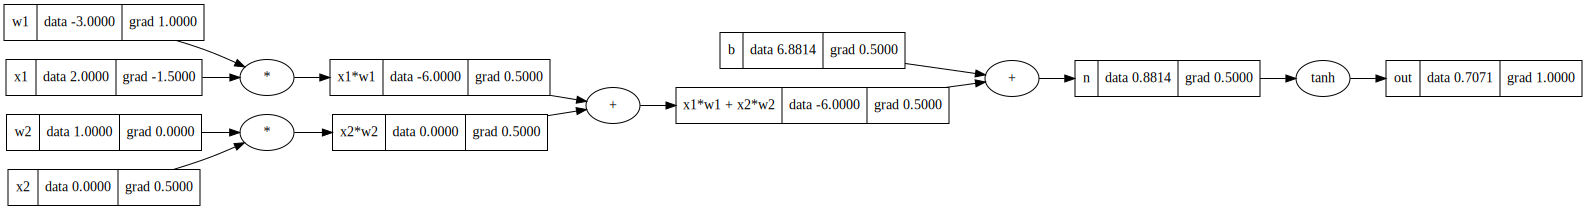

In [39]:
draw_dot(o)

In [40]:
# Let's avoid having to call _backward manually as well.

### Automation of Backpropagation
#### Topological Sort
Topological sort arranges graphs in "topological" order, i.e. in terms of its dependencies. All the edges go only one way (eg. left to right). Here's an algorithm for creating a topological graph.

In [41]:
# Creating a topological sorting algorithm:
topo = []
visited = set()
# Starts at some root node "v"
def build_topo(v):
    if v not in visited:
        visited.add(v)
        # Calls build_topo on all of "v"'s children
        for child in v._prev:
            build_topo(child)
        topo.append(v) # then adds itself to the list.
        # Notice "v" is not added until all of its children have been processed. This is FILO (queueing, not stacking).

build_topo(o)
topo

[Value(data=6.88137),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813700000000004),
 Value(data=0.7071049876722272)]

In [42]:
# Then we call ._backward() on each node in topological order:
o.grad = 1.0

for node in reversed(topo):
    node._backward()

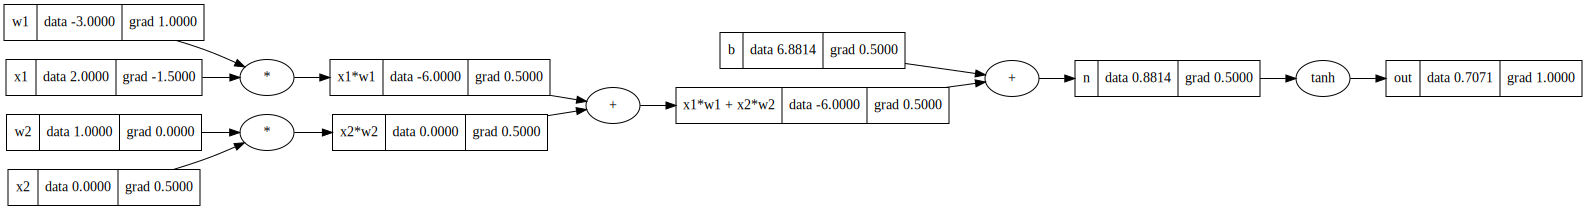

In [43]:
draw_dot(o)

In [44]:
# Now we implement all this code into our Value class:
# How can we implement the backward pass automatically?
# Let's modify the Value object. We are going to store a self._backward function which will do the chain rule at each node.
# We are also going to add some additional functions, namely:
#    make __add__ and __mul__ commutative;
#    define e**x;
#    define x**k;

class Value:
    # Initialization:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        # Initializing gradient at 0:
        self.grad = 0.0
        # Defining backward function:
        self._backward = lambda: None  # by default, the function does nothing!
        # Defining _prev as a set for efficiency:
        self._prev = set(_children)
        self._op = _op
        self.label = label

    # Function that Python calls when "return" is called on a Value object:
    def __repr__(self):
        return f"Value(data={self.data})"

    # We have to define the addition of Value objects:
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # accounts for the case when "other" is an int, not a Value
        out = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    # Fallback addition:
    def __radd__(self, other):
        return self + other

    # Negation:
    def __neg__(self):
        return self * -1

    # Subtraction:
    def __sub__(self, other):
        return self + (-other)

    # Multiplication of Value objects:
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # accounts for the case when "other" is an int, not a Value
        out = Value(self.data * other.data, (self, other), "*")
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    # Fallback multiplication (eg. 2*a wouldn't work above):
    def __rmul__(self, other):  # for other * self
        return self * other

    # Exponentiation by a power:
    def __pow__(self, other):   
        assert isinstance(other, (float, int))  # only supporting float/int powers
        out = Value(self.data ** other, (self, ), f"**{other}")
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward
        return out

    # Division:
    def __truediv__(self, other):  # self / other
        return self * (other ** -1)

    # Defining our activation function for Value:
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
        out = Value(t, (self, ), "tanh")
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out

    # Defining exp():
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), "exp")
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out

    # Defining ReLU:
    def relu(self):
        x = self.data
        x = max(x, 0)
        out = Value(x, (self, ), "relu")
        def _backward():
            self.grad += 1 if x > 0 else 0
        out._backward = _backward
        return out

    def backward(self):
        # Creating a topological sorting algorithm:
        topo = []
        visited = set()
        # Starts at some root node "v"
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                # Calls build_topo on all of "v"'s children
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()


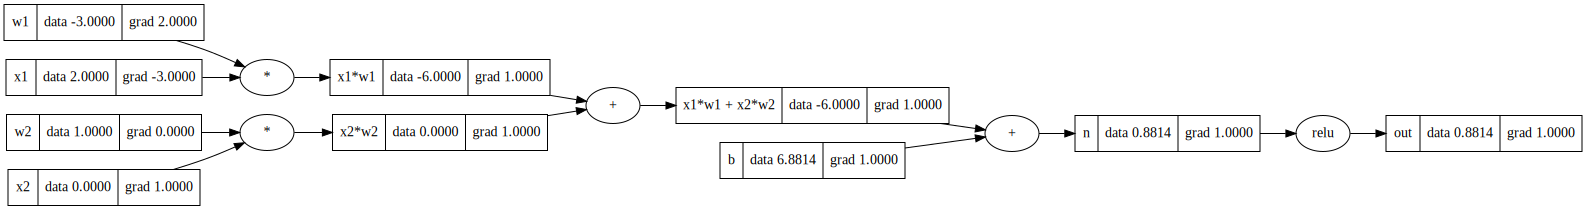

In [45]:
# Creating an example neuron:
# Inputs (x1, x2)
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights (w1, w2)
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.88137, label='b')

# Calculations:
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# Let's apply an activation function:
o = n.relu(); o.label = 'out'

draw_dot(o)

o.backward()
draw_dot(o)

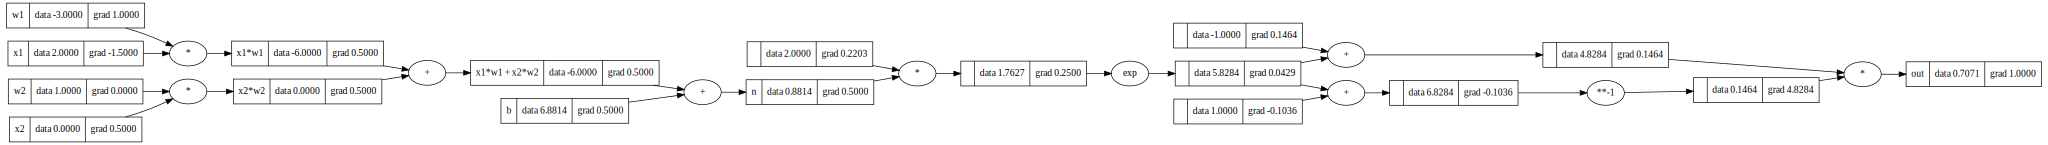

In [46]:
# But there's a bug! Any time a variable is used more than once, we overwrite the gradient each time .grad is called. The solution
# is accumulating these gradients. Hence we've modified the = to += above.

# Using our new functions:
# Creating an example neuron:
# Inputs (x1, x2)
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights (w1, w2)
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.88137, label='b')

# Calculations:
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# Let's apply an activation function:  (this is our tanh in terms of e^x)
e = (2*n).exp()
o = (e - 1)/(e + 1); o.label = 'out'

draw_dot(o)

o.backward()
draw_dot(o)

### PyTorch Equivalent
We've essentially implemented part of PyTorch here. It's a very small section, and very limited compared to PyTorch itself, but here's the equivalent statement using the PyTorch library.

In [47]:
import torch
x1 = torch.Tensor([2.0]).double()                     ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                     ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()                    ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                     ; w2.requires_grad = True
b = torch.Tensor([6.88]).double()                     ; b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data)
print(o.data.item())
o.backward()

# Printing values:
print('w1', w1.grad.item())
print('x1', x1.grad.item())
print('x2', x2.grad.item())
print('w2', w2.grad.item())

tensor([0.7064], dtype=torch.float64)
0.7064193777288968
w1 1.0019433255382364
x1 -1.5029149883073547
x2 0.5009716627691182
w2 0.0


## Building a Neural Net Library (note that some of this isn't working, tanh() is not behaving)

### Building a Neuron, Layer and MultiLayerPerceptron class.

In [48]:
# Let's build a Neuron.
import math
import numpy as np
import random

class Neuron:
    # Initialization:
    #     nin:  number of inputs to this Neuron
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]   # initializing nin random weights
        self.b = Value(random.uniform(-1, 1))                         # initializing 1 random bias

    # When a neuron is "called";
    #    eg.  x = [2.0, 3.0]
    #         n = Neuron(2)      # neuron with 2 inputs
    #         n(x) ==> n.__call__(x)
    #    We want this to return:
    #         n(x) ==> w * x + b
    def __call__(self, x):
        # Let's pair up the values in self.w and x by zipping:
        act = sum((wi*xi for wi, xi in zip(self.w, x))) + b   # iterating over the zipped list, multiplying pairwise, summing all, adding b.
        out = act.tanh()
        return out

    # Defining an array of parameters for this neuron:
    def parameters(self):
        return self.w + [self.b]



class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]   # a list of nout neurons.

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]   # calling a list of neurons = calling neurons element-wise in list
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        params = []
        for neuron in self.neurons:
            params.extend(neuron.parameters())
        return params



class MultiLayerPerceptron:
    # Initialization takes nin and a list of nouts.
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]   # a list of layers through iteration

    def __call__(self, x):
        # Every element is called sequentially:
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        params = []
        for layer in self.layers:
            params.extend(layer.parameters())
        return params



x = [2.0, 3.0]
n = Neuron(2)
n(x)

n = Layer(2, 3)
n(x)

x = [2.0, 3.0, -1.0]
n = MultiLayerPerceptron(3, [4, 4, 1])
n(x)

Value(data=0.9999947639622246)

In [49]:
# draw_dot(n(x))

In [50]:
# Let's create some sample inputs and desired outputs.
# Inputs:
xs = [
    [-2.0, 3.5, -1.0],
    [3.0, -12.0, 0.5],
    [0.5, 1.0, -2.0],
    [1.0, 1.0, -1.5]]

# Desired outputs:
ys = [1.0, -1.0, -1.0, 1.0]

ypred = [n(x) for x in xs]
ypred

# How do we tune the weights to better achieve these desired targets?
# We define the loss function.

[Value(data=0.9999947639622245),
 Value(data=0.9999947640606124),
 Value(data=0.9999947639622246),
 Value(data=0.9999947639622246)]

### Defining the Loss Function

In [51]:
# We'll use MSE loss.
loss = sum([(yout - ytrue)**2 for ytrue, yout in zip(ys, ypred)])
loss.data

7.999958112201012

In [52]:
loss.backward()

7.999958112201012


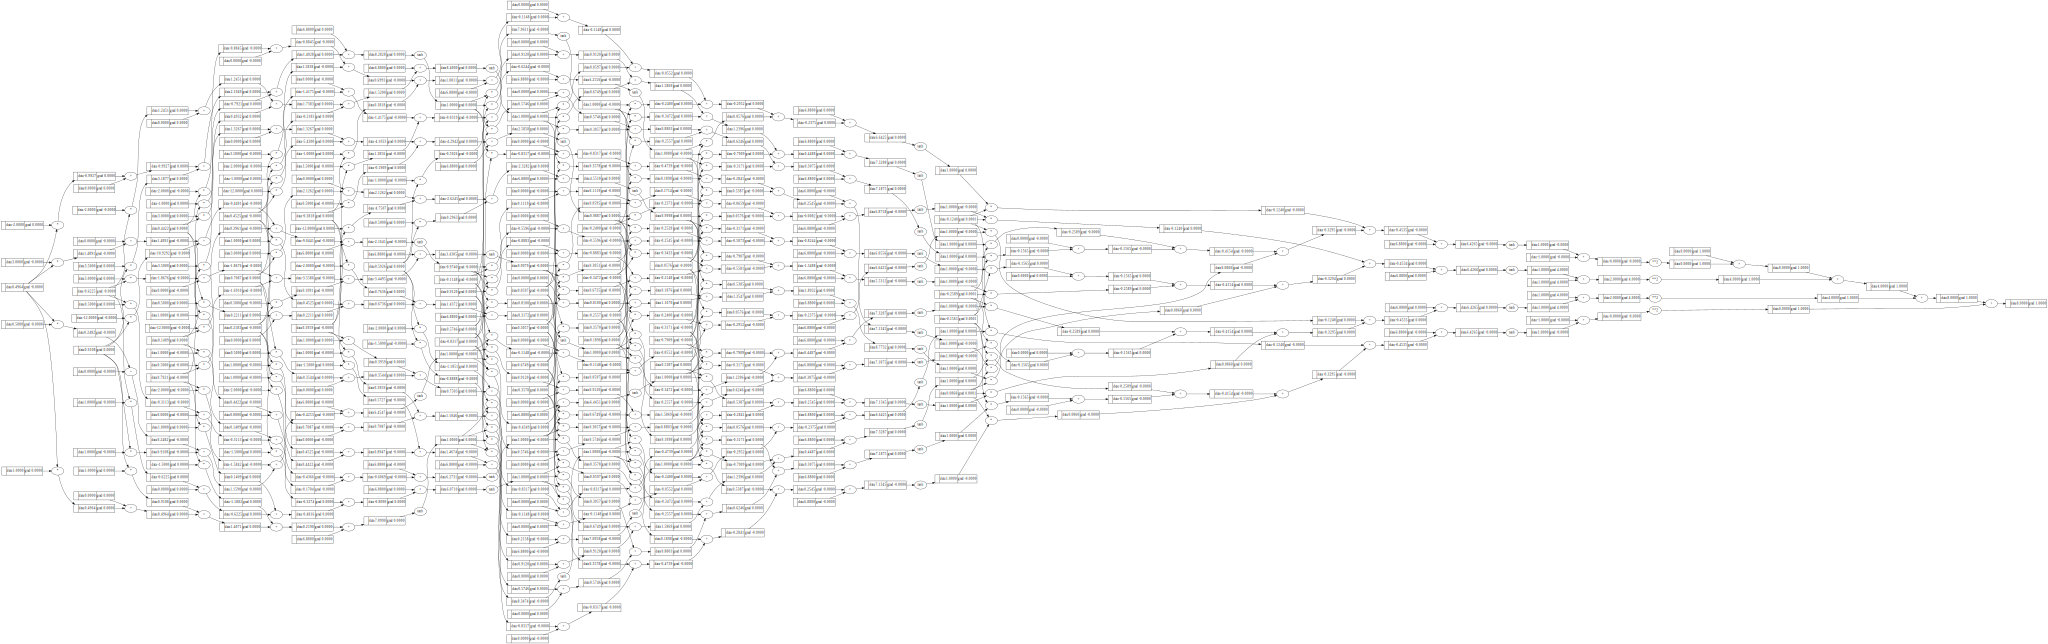

In [53]:
# Our gradients are too small to see. Let's use a different activation function. I've added ReLU to the Value class.
# Note that we've used ReLU() instead of tanh() here.
n.layers[0].neurons[2].w[2].grad
print(loss.data)
draw_dot(loss)

In [54]:
# Remember that the input data cannot be modified, although we have gradients for it. We can only modify the neural network parameters
# i.e. we can change the weights and biases. 

# Let's implement nudging based on our gradient information.

In [55]:
# We've implemented parameters:
n.parameters()

[Value(data=0.4963744339781644),
 Value(data=0.910769345477191),
 Value(data=0.7921051791899156),
 Value(data=-0.7212058039320413),
 Value(data=-0.6225422585200842),
 Value(data=0.14091828091680703),
 Value(data=0.21827794099532594),
 Value(data=-0.39404243410664996),
 Value(data=0.44223065738046663),
 Value(data=0.4525015235738552),
 Value(data=-0.38178353021290734),
 Value(data=-0.3357406957108664),
 Value(data=0.7087479037269415),
 Value(data=0.3958924580605514),
 Value(data=0.5925640688404463),
 Value(data=-0.5882498073326847),
 Value(data=0.5745875971626262),
 Value(data=0.30574313325215297),
 Value(data=-0.2557009018974177),
 Value(data=-0.31713606818574847),
 Value(data=-0.9918464282678596),
 Value(data=0.9120104957921633),
 Value(data=0.6748632637483489),
 Value(data=-0.34722855038163325),
 Value(data=-0.7908906676037868),
 Value(data=0.11496776533906639),
 Value(data=-0.8316876590891127),
 Value(data=0.3577623668456784),
 Value(data=0.18978767093086302),
 Value(data=0.53866075

In [56]:
# We'd like to nudge each of these parameters by our desired step:
loss.backward()

In [57]:
step = 0.1

for p in n.parameters():
    # The negative sign to decrease the loss, since grad points in positive gradient.
    p.data += -step * p.grad


In [58]:
# Updating loss:
ypred = [n(x) for x in xs]
loss = sum([(yout - ytrue)**2 for ytrue, yout in zip(ys, ypred)])
# We'll use MSE loss.
loss.data

7.999958081309639